[Link to our site](https://lindsayhardy17.github.io/)

# <center>Evaluating the changes in art museums </center>
### <center>Lindsay Hardy and Emily O'Connell </center>

## Goals

For our project, we will be analyzing a [dataset](https://github.com/MuseumofModernArt/collection/blob/master/Artworks.csv) concerning the collection of the Museum of Modern Art (MoMA). The MoMA over the past twenty years has gone through a couple expansions, the first finishing in 2004 and the second finishing in 2019. For our analysis we mainly plan to focus on its changes that started in 2014.

In 2014 MoMA revealed its plans to expand and add 47,000 square feet to its current gallery space. This addition the MoMA said will allow for new and innovative displays and reorganization of the museum. With this expansion they had distinct goals of "diversifying the canon, embracing the present, and showing 1,000 more of its artworks." Through this the curators plan to spotlight the work of women, African American, Asian, and Latino artists who have been previously overlooked in the collection. “We feel that many, many regions that once seemed peripheral don’t seem that way any more, they seem central. Figures who once seemed secondary now seem primary,” said MoMA chief curator Ann Temkin. In order to do this the MoMA has had to actively work over the past years to diversify their collection so that they will be able to accurately meet the goals that they had laid out for themselves. 

When looking at the MoMA dataset, with their goals in mind, our overarching question is exploring whether or not MoMA fulfilled its goal of expanding the diversity of its art collection. In order to see if this shift was reflected in their collection and acquisitions, we will attempt to measure the overall diversity a work adds to the collection by analyzing the relevant aspects of the artwork such as the artist's nationality, the artist’s gender, the year the work was created, the year it was acquired, and various other factors. Although it is impossible to truly quantify the abstract concept of diversity, we believe that analyzing overall patterns in acquisitions will be helpful in determining whether or not MoMA has been successful in its goal of introducing new viewpoints to its collection. 

### The questions that we plan to answer: 
1. Is there an overwhelming number of male artists represented?
2. Has MoMA recently been acquiring artwork from non-American at a higher frequency than in the past?
3. Is the artwork acquired from non-American artists from Western European countries or elsewhere?
4. How does the average age of a work of art change in different time periods? 

By answering all of these smaller questions, we will be able to make a judgement on our overall  research question of assessing the diversity of the collection in recent years. We will also look at the trends over time to see if there are changes in what kind of artwork MoMA typically collects and note any differences between time periods. We have found a rich and detailed dataset with 130,262 works of art owned by MoMA acquired from 1929 to 2017. Although our dataset for the MoMA stops at 2017, but we believe that we will be able to conduct a thourough analysis of their goals, as they laid out their goals for changes in early 2014, so we will have around three years of data to work with and compare with their previous activities. So in all we will have a lot of information pertaining to the type of artwork MoMA has acquired in different time periods.  

### Comparison with other museums
In addition to the thorough analysis we will conduct on MoMA dataset, we also plan to compare the MoMA’s collection to other large modern/contemporary art museums like the [Tate](https://github.com/tategallery/collection), a modern art museum in London. Through a comparison of the Tate and the MoMA we will be able to see if there are any differences in collections and trends between museums in two different countries. The Tate's collection is slightly smaller than MoMA's, only having 70,000 works, and the dataset that we have only representing 69,274 of those works. Because of this when we conduct comparisons between the two datasets we will need to be mindful of the difference in size of the two museums.

We will also investigate the collection of the [Metropolitan Museum of Art](https://github.com/metmuseum/openaccess), another famous art museum in New York City. Even though the Met is not specifically focused on modern art, we will be able to key into its modern/contemporary art collection and only focus specifically on those works. The number of modern/contemporary works that the Met has is much smaller than the MoMAs, only 13,452, but we believe this will still allow us some insight into the differences and similarities between the two museums. By comparing the MoMA to these other museums we will be able to see if they not only reached their goals but if their goals place them as a forward thinker on modern art and not just a part of the crowd. 

### Outline
We have laid out our work flow below by starting with cleaning the MoMA data, then conducting individual analysis on it to answer our questions stated above. Then we clean the Tate data and compare it to the data from the MoMA. Afterwards we clean the Met data, and in a similar fashion to how we compared the Tate dataset, we will do the same analysis between the Met and the MoMA. Finally we have a conclusion section at the bottom stating our overall findings and what we believe the analysis has shown us.

### Collaboration Plan
In terms of collaboration, we have set up a [GitHub repository](https://github.com/lindsayhardy17/lindsayhardy17.github.io) and plan for storing the datasets, sharing code, and version control. We intend to meet on Zoom once a week on Tuesdays at 3:10, right after class, and will also be flexible with adding a second time to meet on Thursday after class as well.  During these meetings we plan to check our progress, solve problems, and ask questions, in addition to communicating outside of scheduled meetings as needed.







## MoMA Data Extraction, Cleaning, and Loading

The first thing that we needed to do was unzip our files. We originally tried to pull the data from the github repo, but the MoMA has a no pull policy. So instead we downloaded the data from kaggle.

In [1]:
import pandas as pd
import zipfile
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
pd.options.mode.chained_assignment = None

We unzipped the files and placed them in a working form in our folder

In [2]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

Next we read in the Artworks file and the Artists file and created a new dataframe called gender. We will be analyzing the gender and nationality of the artists so we wanted it in our main dataframe. Originally we tried to merge the two dataframes on 'Artist ID', but upon a closer look, "Artist ID" had multiple ids in the artworks dataframe but not in the artists dataframe. Some had up to 5 ids while others only had 1. Because of this we decided to just merge on "Name" because of its consistence across both dataframes. Once we merged we renamed the dataframe "moma". The resulting dataframe is made up of the works title, the artist and their background, the name of the work, information on the medium and different measurement types, when the moma acquired the work, and a couple other minor things. We are looking to analyze the dataframe to find insights on the dates that they were acquired with regard to when the works were made and if there were significant changes in the works acquired after a certain year. We think with this dataset we will be able to do all of these things because of the columns below, but will need to make sure that the columns are in the correct format.

In [3]:
moma_artworks = pd.read_csv("Artworks.csv")
moma_artists = pd.read_csv("Artists.csv")
moma_artists.columns

Index(['Artist ID', 'Name', 'Nationality', 'Gender', 'Birth Year',
       'Death Year'],
      dtype='object')

In [4]:
gender = moma_artists[["Gender", 'Name', 'Nationality', 'Birth Year','Death Year']]
moma = moma_artworks.merge(gender, on = ['Name'], how = 'left')
moma['Gender'] = moma['Gender'].replace({'male':'Male'})
moma.head()

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s),Gender,Nationality,Birth Year,Death Year
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,48.6000,NaN,168.9000,NaN,NaN,NaN,Male,Austrian,1841.0,1918.0
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,40.6401,NaN,29.8451,NaN,NaN,NaN,Male,French,1944.0,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,34.3000,NaN,31.8000,NaN,NaN,NaN,Male,Austrian,1876.0,1957.0
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,50.8000,NaN,50.8000,NaN,NaN,NaN,Male,NaN,1944.0,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,38.4000,NaN,19.1000,NaN,NaN,NaN,Male,Austrian,1876.0,1957.0


Then we checked on the datatypes, everything looked like it was the right type of object except for the dates, so we first changed Acquisition Date

In [5]:
display(moma.dtypes)
#checked to see if the values are correct, the date and the acquisition date aren't in date time so converting them
moma['Acquisition Date'] = pd.to_datetime(moma['Acquisition Date'], errors = 'coerce')
#changed to datetime
moma.dtypes

Artwork ID              int64
Title                  object
Artist ID              object
Name                   object
Date                   object
Medium                 object
Dimensions             object
Acquisition Date       object
Credit                 object
Catalogue              object
Department             object
Classification         object
Object Number          object
Diameter (cm)         float64
Circumference (cm)    float64
Height (cm)           float64
Length (cm)           float64
Width (cm)            float64
Depth (cm)            float64
Weight (kg)           float64
Duration (s)          float64
Gender                 object
Nationality            object
Birth Year            float64
Death Year            float64
dtype: object

Artwork ID                     int64
Title                         object
Artist ID                     object
Name                          object
Date                          object
Medium                        object
Dimensions                    object
Acquisition Date      datetime64[ns]
Credit                        object
Catalogue                     object
Department                    object
Classification                object
Object Number                 object
Diameter (cm)                float64
Circumference (cm)           float64
Height (cm)                  float64
Length (cm)                  float64
Width (cm)                   float64
Depth (cm)                   float64
Weight (kg)                  float64
Duration (s)                 float64
Gender                        object
Nationality                   object
Birth Year                   float64
Death Year                   float64
dtype: object

While we were checking the different values we realized that the Date, the year the artwork was created, had a lot of different problems and could not be analyzed because of its different date representations, like having 1967-1977, or c. 1989, or early 1992. Because of this we had to fix the Date column, which is shown below. Having this column be correct is very important to us because the date of creation is crucial to our analysis.

In [6]:
moma['Date'].unique()[:100]
#a small sample of the unique types and their differences 

array(['1896', '1987', '1903', '1980', '1976-77', '1968', '1900', '1978',
       '1905', '1906', '1979', '1980-81', '1918', '1970', '1975', '1984',
       '1986', '1974', 'n.d.', 'c. 1917', '1917', '1923', 'Unknown',
       '1930', '1936', '1935', '1937', '1938', '1977', '1958', '1985',
       '1989', '1949', '1958–1964', 'c. 1935', '1991', '1941', '1965',
       '1981', '1983', '1985–1988', 'c. 1989-91', '1992', '1915-17',
       'c. 1915-17', '1953', '1910', 'c.1985', '1982–1986', '1982-86',
       '1945', '1923–1924', '.1-3 1987; .4 1990', '1990', '1976', '1995',
       '1927–1931', 'c. 1929-30', '1964', '1959', 'c. 1918-20',
       'c.1918-1920', '1939', 'c.1976', '1975-79', '1993', '1996', '1988',
       '1982-83', '1982–1983', '1952-53', '1921', '1957', '1972',
       '1956-57', '1924', '1962', '1925', '1960', '1969', '1963', '1994',
       '1961', '1960-61', '1952', 'c. 1978-84', '1927', '1979–1985',
       'before 1933', '1929', 'c. 1960-62', '1967', '1956', 'c. 1961',
       '

In [7]:
n_d = moma[(moma["Date"] == "nan") | (moma["Date"] == "n.d") | (moma["Date"] == "Unkn") | (moma["Date"] == "Unknown") | (moma["Date"] == "Various") | (moma["Date"] == "unknown")].index
moma.drop(n_d, inplace = True)

First we removed the obvious components that were incorrect, but then realized the large extent to which the dataset had issues, so we used regular expressions to extract a date, shown below, and then checked the remaining dates that were not in the correct format that we missed

In [8]:
moma['date_edit'] = moma['Date'].str.extract('(\d{4})', expand = False)
#creating a new column to store the dates
moma[(moma['date_edit'].isnull() == True) & (moma['Date'].isnull() == False)]['Date'].unique()
#checking where the date_edit is null but the Date is true - these will be the remaining dates that could
#not be converted to a correct date format with four numbers

array(['n.d.', '8th-9th century C.E.', '7th-8th century C.E.', 'Unkown',
       '(London?, published in aid of the Comforts Fund  for Women and Children of Sovie',
       '(n.d.)', 'New York', 'November 10', '(19)71', '(19)69',
       'date of publicati', 'nd', 'no date',
       '(newspaper published March 30)', 'n. d.', 'c. 196?', 'TBC', 'TBD'],
      dtype=object)

Because none of these dates had any meaning to us, we could officially switch over to have the date_edit column be our official date column, which we do below

In [9]:
moma['Date'] = moma['date_edit']
moma.drop(columns=['date_edit'], inplace = True)
moma['Date'].unique()
#one last check to make sure that all of our corresponding values are actually dates

array(['1896', '1987', '1903', '1980', '1976', '1968', '1900', '1978',
       '1905', '1906', '1979', '1918', '1970', '1975', '1984', '1986',
       '1974', nan, '1917', '1923', '1930', '1936', '1935', '1937',
       '1938', '1977', '1958', '1985', '1989', '1949', '1991', '1941',
       '1965', '1981', '1983', '1992', '1915', '1953', '1910', '1982',
       '1945', '1990', '1995', '1927', '1929', '1964', '1959', '1939',
       '1993', '1996', '1988', '1952', '1921', '1957', '1972', '1956',
       '1924', '1962', '1925', '1960', '1969', '1963', '1994', '1961',
       '1933', '1967', '1934', '1940', '1946', '1955', '1997', '1922',
       '1942', '1954', '1916', '1973', '1926', '1932', '1947', '1943',
       '1944', '1966', '1971', '1999', '1951', '1913', '1928', '1886',
       '1920', '1950', '1931', '1901', '1948', '1912', '1908', '1902',
       '1904', '1998', '1898', '1875', '1880', '1909', '1501', '1897',
       '1907', '1895', '1914', '1885', '1768', '1878', '1808', '1865',
       '1

After we officially had all the values as dates we converted them to a date time

In [10]:
# convert the strings back to integers
moma['Date'] = pd.to_datetime(moma['Date'], errors="coerce")
moma['Date'] = moma['Date'].dt.year

One of the main things that we will be looking at is when the MoMA acquired the work of art. Without this knowledge we won't be able to see if they really changed following their addition. Because of this we removed works that did not have a date from the original dataframe moma. We decided not to remove the date of the creation of art for right now because we believe those works could potentially be useful.

In [11]:
# dropped dates that didn't have an acquisition date
no_date = moma[(moma['Acquisition Date'].isnull() == True)].index
moma.drop(no_date, inplace = True)

After cleaning the data we began to add in columns that we would utilize in our analysis. The first column that we planned on adding was a distinguisher of if the artist was alive when the work was acquired or not.

In [12]:
moma['age_made'] = moma['Date'] - moma['Birth Year']
moma['alive?'] = moma['Date']

In [13]:
def alive(acquisition,death):
    if acquisition > death:
        return 'False'
    else:
        return 'True'
moma['Acquisition Year'] = moma['Acquisition Date'].dt.year
moma['alive?'] = moma.apply(lambda row: alive(row['Acquisition Year'],row['Death Year']),axis=1)

Next we created a column to determine if the artists was of European or Western descent.

In [14]:
moma['Nationality'].unique()

array(['Austrian', 'French', nan, 'American', 'German', 'Swedish',
       'British', 'Japanese', 'Italian', 'Argentine', 'Swiss',
       'Brazilian', 'Luxembourgish', 'Spanish', 'Dutch', 'Russian',
       'Iranian', 'Finnish', 'Danish', 'Belgian', 'Nationality unknown',
       'Mexican', 'Czech', 'Romanian', 'Polish', 'Cuban', 'Chilean',
       'Puerto Rican', 'Uruguayan', 'Venezuelan', 'Moroccan', 'Colombian',
       'Australian', 'Chinese', 'Yugoslav', 'Hungarian', 'Canadian',
       'Slovenian', 'Latvian', 'Nationality Unknown', 'Various', 'Greek',
       'Haitian', 'Israeli', 'Icelandic', 'Czechoslovakian', 'Croatian',
       'Norwegian', 'Thai', 'Algerian', 'Guatemalan', 'Indian',
       'Ukrainian', 'Irish', 'Costa Rican', 'Korean', 'Ethiopian',
       'Kuwaiti', 'Scottish', 'South African', 'Zimbabwean', 'Portuguese',
       'Panamanian', 'Ecuadorian', 'Peruvian', 'Congolese', 'Malian',
       'Turkish', 'Cambodian', 'Bosnian', 'Canadian Inuit', 'Slovak',
       'Estonian', 'Pak

From looking at these unique values we can see that there are a couple of ways to designate if a person had an unknown nationality, which we deal with below. But all the nationalities, if they exhist, are in English and in a correct format.

In [15]:
moma.loc[moma['Nationality'] == 'nan', 'Nationality'] = 'no'
moma.loc[moma['Nationality'] == 'Nationality unknown', 'Nationality'] = 'no'
moma.loc[moma['Nationality'] == 'Nationality Unknown', 'Nationality'] = 'no'
moma.loc[moma['Nationality'] == 'Various', 'Nationality'] = 'no'
moma.loc[moma['Nationality'] == 'nationality unknown', 'Nationality'] = 'no'
moma.loc[moma['Nationality'] == np.nan, 'Nationality'] = 'no'
moma['Nationality'] = moma['Nationality'].fillna('no')

In order to tell if the person is European/Western or not, we mad a list of all the nationalities that the MoMA has that are non-European/Western nationalities.

In [16]:
nationalities_moma = ['Japanese',  'Argentine', 
 'Brazilian', 'Russian',
       'Iranian',
       'Mexican', 'Cuban', 'Chilean',
       'Puerto Rican', 'Uruguayan', 'Venezuelan', 'Moroccan', 'Colombian',
       'Australian', 'Chinese', 'Yugoslav', 'Latvian',
       'Haitian', 'Israeli', 'Icelandic', 'Thai', 'Algerian', 'Guatemalan', 'Indian',
       'Ukrainian', 'Costa Rican', 'Korean', 'Ethiopian',
       'Kuwaiti', 'South African', 'Zimbabwean',
       'Panamanian', 'Ecuadorian', 'Peruvian', 'Congolese', 'Malian',
       'Turkish', 'Cambodian', 'Bosnian', 'Canadian Inuit',
       'Estonian', 'Pakistani', 'Bolivian', 'Taiwanese', 'Paraguayan',
       'Nicaraguan', 'Tunisian', 'Sudanese', 'Tanzanian', 'Guyanese',
       'Senegalese', 'Bahamian', 'Lebanese', 'Kenyan',
       'Nigerian', 'Georgian', 'Egyptian', 'Albanian', 'Azerbaijani',
       'Ivorian', 'Malaysian', 'Singaporean', 'Serbian', 'Lithuanian',
       'Tajik', 'New Zealander', 'Namibian', 'Native American',
       'Ghanaian', 'Afghan', 'Ugandan',
       'Cameroonian', 'Welsh', 'Mauritanian', 'Palestinian', 'Syrian',
       'Saudi Arabian', 'Kazakhstani', 'Rwandan', 'Iraqi', 'Indonesian',
       'Vietnamese', 'Burkinabe', 'Macedonian', 'Kyrgyzstani', 'Filipino',
       'Mozambican', 'Angolan']

Then we made a function for the MoMA that designated if a person was European/Western or not, created a new column, and placed it in the MoMA dataframe. When deciding whether a country was designated as European/Western or not we refered to a list of European countries from this website: https://datahub.io/opendatafortaxjustice/listofeucountries#resource-listofeucountries

In [17]:
moma['European?'] = ['False'] * len(moma['Nationality'])

In [18]:
def nation(nationality):
    if nationality in nationalities_moma:
        return 'False'
    elif nationality == 'no':
        return np.nan
    else:
        return 'True'
moma['European?'] = moma.apply(lambda row: nation(row['Nationality']),axis=1)
moma.loc[moma['Nationality'] == 'no', 'Nationality'] = np.nan

After cleaning and adding in extra columns for analysis, we can now create smaller datasets that only contain related columns, with names_dates_moma being the one we will be using most often.

In [19]:
ids = moma[['Artwork ID', 'Artist ID']]
names_dates_moma = moma[['Title', 'Name', 'Date', 'Acquisition Date', 'Artwork ID', 'Gender', 'Credit', 'Nationality','age_made'
                   , 'alive?', 'European?']]
dimensions = moma[['Artwork ID','Dimensions', 'Diameter (cm)',
       'Circumference (cm)', 'Height (cm)', 'Length (cm)', 'Width (cm)',
       'Depth (cm)', 'Weight (kg)', 'Duration (s)']]
credit = moma[['Artwork ID','Credit']]
extra = moma[['Medium', 'Department', 'Classification', 'Artwork ID']]

In [20]:
names_dates_moma.head()

,Title,Name,Date,Acquisition Date,Artwork ID,Gender,Credit,Nationality,age_made,alive?,European?
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,1896.0,1996-04-09,2,Male,Fractional and promised gift of Jo Carole and ...,Austrian,55.0,False,True
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,1987.0,1995-01-17,3,Male,Gift of the architect in honor of Lily Auchinc...,French,43.0,True,True
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,1903.0,1997-01-15,4,Male,Gift of Jo Carole and Ronald S. Lauder,Austrian,27.0,False,True
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,1980.0,1995-01-17,5,Male,Purchase and partial gift of the architect in ...,NaN,36.0,True,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,1903.0,1997-01-15,6,Male,Gift of Jo Carole and Ronald S. Lauder,Austrian,27.0,False,True


## Analysis: Trends in the MoMA Dataset

Before we look at other datasets we will conduct analysis on the MoMA by itself, starting with a timeline showing the acquisition of art by the MoMA of female and non-Western/European artist in recent years.

### Has MoMA acquired more diverse (based on gender and nationality) works of art in recent years?

In [21]:
# number of works acquired each year 
acquisitions_per_year = moma.groupby(['Acquisition Year'])["Artwork ID"].count().to_frame().reset_index().rename({"Artwork ID": "num_works_acquired"},axis=1)

In [22]:
# proportion of art by female artists for each year
female_per_year = moma[moma.Gender == 'Female'].groupby(['Acquisition Year'])["Artwork ID"].count().to_frame().reset_index()
female_per_year = female_per_year.reset_index()

pct_female = female_per_year["Artwork ID"] / acquisitions_per_year["num_works_acquired"]
female_per_year["percent_female"] = pct_female

<AxesSubplot:title={'center':'Proportion of Works by Female Artists Acquired'}, xlabel='Acquisition Year'>

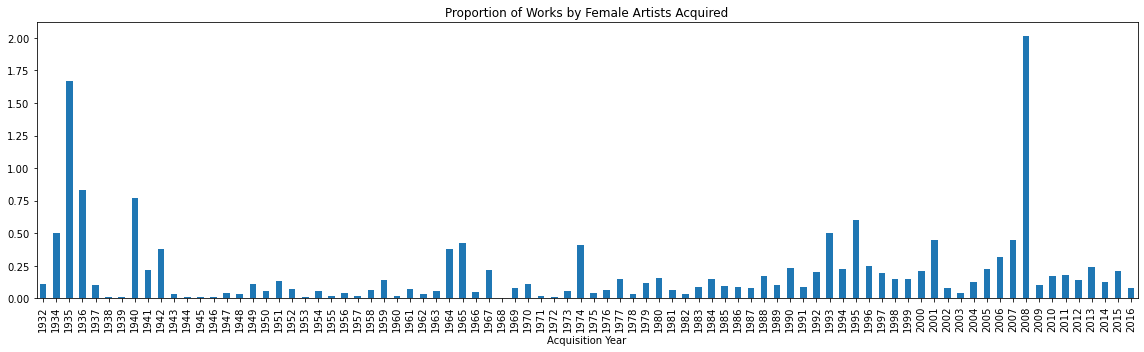

In [23]:
# The proportion of works by female acquired each year
female_per_year = female_per_year.set_index("Acquisition Year")
female_graph = female_per_year["percent_female"].plot(kind='bar', figsize=(16, 5), title = "Proportion of Works by Female Artists Acquired")
female_graph.figure.tight_layout()
female_graph

In [24]:
#number of works by non American artists acquired each year 
nonAmerican_by_year = moma[moma.Nationality != 'American'].groupby(['Acquisition Year'])["Artwork ID"].count().to_frame().reset_index()
# proportion of art by female artists for each year
nonAmerican_by_year["percent_nonAmerican"] = (nonAmerican_by_year["Artwork ID"] / acquisitions_per_year["num_works_acquired"])

<AxesSubplot:title={'center':'Proportion of Works by nonAmerican Artists Acquired'}, xlabel='Acquisition Year'>

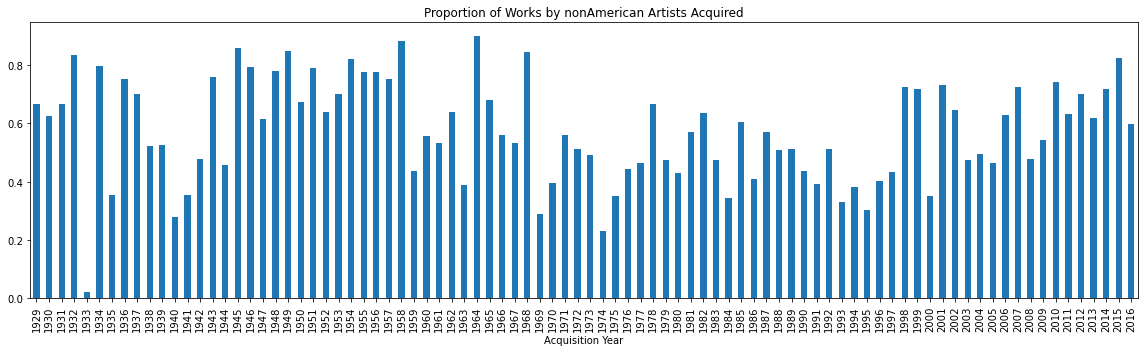

In [25]:
# The proportion of works by nonAmerican acquired each year
nonAmerican_by_year = nonAmerican_by_year.set_index("Acquisition Year")
na_graph = nonAmerican_by_year["percent_nonAmerican"].plot(kind='bar', figsize=(16, 5), title = "Proportion of Works by nonAmerican Artists Acquired")
na_graph.figure.tight_layout()
na_graph

<strong>Conclusion: </strong> There is no discernable pattern in the number of diverse works that MoMA acquires each year. However, in the past 20 years, there has been an increase in years that have a high number of works of art by female or non-American artists. It looks like they were more successful in collecting works by non Americans than they were works from female artists.

Next we examine if the MoMA has done what it said it had a goal of doing: bringing the art up to the present.

### Has the MoMA strived to acquire art by more recent artists?

<AxesSubplot:title={'center':'Acquistion of Living vs Dead Artists Over a 38 year period'}, xlabel='acquisitionYear'>

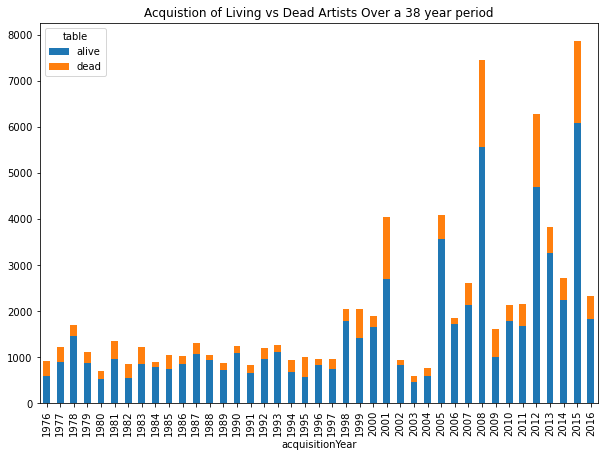

In [26]:
names_dates_moma['acquisitionYear'] = names_dates_moma['Acquisition Date'].dt.year
dead = pd.DataFrame(names_dates_moma[names_dates_moma['alive?'] == 'False'].groupby('acquisitionYear')['alive?'].value_counts())
dead['count'] = dead['alive?']
dead.drop(columns = ['alive?'], inplace = True)
dead = dead.reset_index()
dead.drop(columns = ['alive?'], inplace = True)
dead = dead[dead['acquisitionYear']>1975]
dead['table'] = "dead"
dead_table = dead.pivot(index='acquisitionYear', columns = 'table', values = 'count')

alive = pd.DataFrame(names_dates_moma[names_dates_moma['alive?'] == 'True'].groupby('acquisitionYear')['alive?'].value_counts())
alive['count'] = alive['alive?']
alive.drop(columns = ['alive?'], inplace = True)
alive = alive.reset_index()
alive.drop(columns = ['alive?'], inplace = True)
alive = alive[alive['acquisitionYear']>1975]
alive['table'] = "alive"
alive_table = alive.pivot(index='acquisitionYear', columns = 'table', values = 'count')

#merging the two tables together on acquisitionYear
new = dead_table.merge(alive_table, on = 'acquisitionYear')

#plotting the graph
new.loc[:,['alive','dead']].plot.bar(stacked=True, figsize=(10,7), title = "Acquistion of Living vs Dead Artists Over a 38 year period")

<strong>Conclusion</strong>: Through this visualization it is evident that over time the MoMA has consistently bought more art by living artists than by deceased artists. But as time went on, starting in 2004, there were more consistent peaks in their purchasing of art, but these purchases still maintained the place of importance of purchasing art from living artists. It shows that they have continued to meet their goal and expand their collection to represent the present.

### Examining National and Regional Diversity

In [27]:
# establish which works are American, Western, or non-Western
# A = American, NA-W = Non-American Western, NWNA - Non-Western Non-American
moma_nation = names_dates_moma[names_dates_moma['Nationality'].notna()]
def nationality(nation):
    if nation == 'American':
        return 'A'
    if nation not in nationalities_moma:
        return 'NA-W'
    else:
        return 'NWNA'
moma_nation['Western/American'] = moma_nation.apply(lambda row: nationality(row['Nationality']),axis=1)

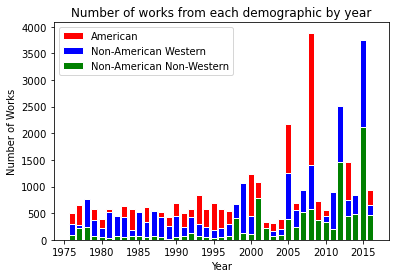

In [28]:
# extract year from acquisition date
moma_nation['acquisitionYear'] = moma_nation['Acquisition Date'].dt.year

# make a pivot table of American art
A = pd.DataFrame(moma_nation[moma_nation['Western/American'] == 'A'].groupby('acquisitionYear')['Western/American'].value_counts())
A['count'] = A['Western/American']
A.drop(columns = ['Western/American'], inplace = True)
A = A.reset_index()
A.drop(columns = ['Western/American'], inplace = True)
A = A[A['acquisitionYear']>1975]
A['table'] = "A"
A_table = A.pivot(index='acquisitionYear', columns = 'table', values = 'count')

# make a pivot table of non-American Western art
NAW = pd.DataFrame(moma_nation[moma_nation['Western/American'] == 'NA-W'].groupby('acquisitionYear')['Western/American'].value_counts())
NAW['count'] = NAW['Western/American']
NAW.drop(columns = ['Western/American'], inplace = True)
NAW = NAW.reset_index()
NAW.drop(columns = ['Western/American'], inplace = True)
NAW = NAW[NAW['acquisitionYear']>1975]
NAW['table'] = "NAW"
NAW_table = NAW.pivot(index='acquisitionYear', columns = 'table', values = 'count')

# make a pivot table of non-American, non-Western art
NWNA = pd.DataFrame(moma_nation[moma_nation['Western/American'] == 'NWNA'].groupby('acquisitionYear')['Western/American'].value_counts())
NWNA['count'] = NWNA['Western/American']
NWNA.drop(columns = ['Western/American'], inplace = True)
NWNA = NWNA.reset_index()
NWNA.drop(columns = ['Western/American'], inplace = True)
NWNA = NWNA[NWNA['acquisitionYear']>1975]
NWNA['table'] = "NAW"
NWNA_table = NWNA.pivot(index='acquisitionYear', columns = 'table', values = 'count')

#merging the two tables together on acquisitionYear
new1 = A_table.merge(NAW_table, on = 'acquisitionYear')
new2 = new1.merge(NWNA_table, on = 'acquisitionYear')
new2 = new2.reset_index()

# plot a stacked bar graph of number of works acquired from the 3 demographics
plt.bar(new2['acquisitionYear'], new2['A'], color='r', edgecolor='white', label = 'American')
plt.bar(new2['acquisitionYear'], new2['NAW_x'], color='b', edgecolor='white', label = 'Non-American Western')
plt.bar(new2['acquisitionYear'], new2['NAW_y'], color='g', edgecolor='white', label = 'Non-American Non-Western')

plt.ylabel("Number of Works")
plt.xlabel("Year")
plt.title("Number of works from each demographic by year")
plt.legend()
plt.show()

<strong>Conclusion</strong>: This graph is not quite as straight forward as the ones before. But before the MoMA entered into the early 2000s the amount of art that they acquired from Non-American Non-Western artists was consistently dominated by the amount of art that they acquired from American or Non-American Western artists. As the MoMA entered into the early 2000s, and into 2015, it conssitently aquired more works of art, but at different stages the art that was acquired from Non-American Non-Western artists increased, and in some years topped the number of American and Non-American Western artists, which didn't happen in previous years. From this analysis we see that after the MoMA determind their goals to diversify their cannon in the early 2000s they followed through with that goal and acquired more art from Non-American Non-Western artists than they had done before.

After looking at the distribution over the years of works acquired based on gender, age, and location we now conduct analysis that shows the distribution of countries that the MoMA has art from displayed on a map, utilize a Lorenz and Gini coefficient, and then a linear regression to see how the MoMA's progress compares to a prediction of what is should have been.

## Geographical Analysis

### Comparing the Map of works per country pre-2012 and at the present

Using GeoPandas, we created a maps to show the number of works per country using two different time period: all works before 2012 and all works until present.

<AxesSubplot:>

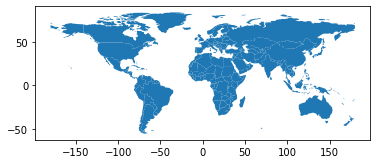

In [29]:
# read the natural earth shape file as a GeoDataFrame
# this file is built into geopandas, so there is no need to download it
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# drop Antartica because it takes up too much space
world = world.drop(world.index[159])

#here's the world map we will use
world.plot()

Since the MoMA DataFrame lists nationality and not country of origin, we need to convert the nationalities into the country names, so it can be merged with the existing geopandas world data. We used a demonyms dataset that included nationalities paired with their respective countries. 

In [30]:
demonyms = pd.read_csv("demonyms.csv")

In [31]:
# merge the MoMA data with the demonyms data to pair the appropriate country with each nationality
moma_nationalities = pd.merge(demonyms, names_dates_moma, on="Nationality", how='inner')

In [32]:
# df of all works before 2012
before_2012 = moma_nationalities[moma_nationalities["acquisitionYear"] <2012]

#get counts of the number of works from each country
count = before_2012["name"].value_counts().astype(int).to_frame().reset_index()
count = count.rename({"index": "name", "name": "count"}, axis=1)

# merge this with the geographic data to graph it and to fill in NaNs for countries not in MoMA
map_pre_2012 = pd.merge(world, count, how="left", on="name")

Text(0.5, 1.0, 'Number of works per country 1929-2011')

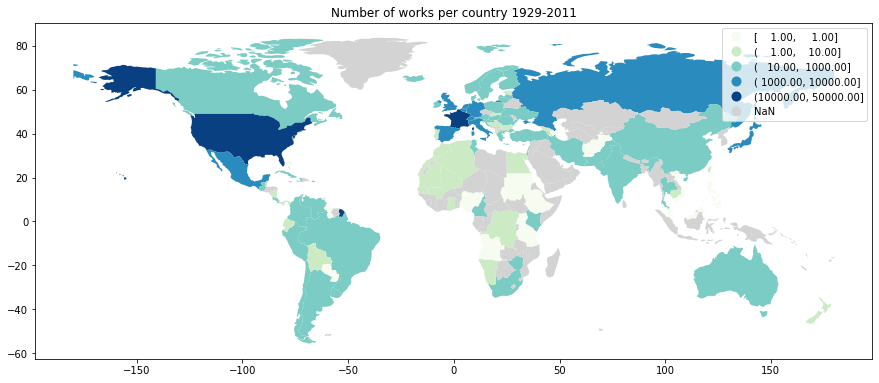

In [33]:
# Plot the pre-2012 Map!

ax1= map_pre_2012.plot(column='count', cmap =    
                                'GnBu', figsize=(15,9),   
                                  k=5, legend =  
                                  True, missing_kwds={'color': 'lightgray'}, scheme="User_Defined", classification_kwds=dict(bins=[1,10,1000,10000,50000],))
ax1.set_title("Number of works per country 1929-2011")

Here is the map of the number of works per country before the beginning of the rennovation in 2012. Let's make another map to show the works per country up until the present.

In [34]:
# same process as above, but with all of the artworks
count = moma_nationalities["name"].value_counts().astype(int).to_frame().reset_index()
count = count.rename({"index": "name", "name": "count"}, axis=1)
map_data = pd.merge(world, count, how="left", on="name")

Text(0.5, 1.0, 'Number of works per country 1929-2017')

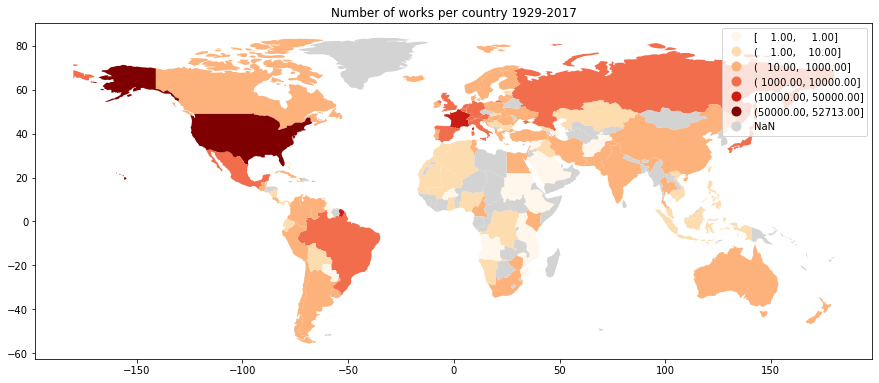

In [35]:
# Plot the current Map!

ax = map_data.plot(column='count', cmap =    
                                'OrRd', figsize=(15,9),   
                                  k=5, legend =  
                                  True, missing_kwds={'color': 'lightgray'}, scheme="User_Defined", classification_kwds=dict(bins=[1,10,1000,10000,50000],))
ax.set_title("Number of works per country 1929-2017")


These visualizations allow us to see the number of works from each country. As we've seen, North America and Europe are very highly represented, particularly the United States, France, and Germany. On the opposite end of the spectrum, 70 countries are not represented and 17 countries are only represented by one work. The bins vary in size and scale to show how polarized the data are. Scaling by 10,000s or even 1,000s is not very revealing because there are so many countries with very few works, so we chose to define the bins in a way that would most clearly show the inequality between countries.

#### Comparing pre-2012 statistics with the present

In [36]:
map_pre_2012[map_data["count"]<=1].name.count()

17

In [37]:
map_data[map_data["count"]<=1].name.count()


17

In [38]:
# countries in the present dataset that are not in the before 2012 dataset 
set(moma_nationalities.name) - set(before_2012.name)

{'Burkina Faso',
 'Indonesia',
 'Iraq',
 'Kazakhstan',
 'Macedonia',
 'Mozambique',
 'Rwanda',
 'Saudi Arabia',
 'Syria'}

Since 2012, MoMA has added art from 8 new countires, and all of them are non-Western. They did not add any works from conutires that were only represented by one work.

## Lorenz Curve and Gini Coefficient

The [Lorenz Curve](https://en.wikipedia.org/wiki/Lorenz_curve) is typically used to depict distribution of wealth, but it also has helpful applications for showing distribution over time of other variables. In this case, we used it to show the distribution of female artists over time. The x axis represents the cumulative percent of the total population and the y axis represents the cumulative proportion of female artists. In perfect equality, this would be a line with slope of 1 (y=x or x and y increase at the same rate). 

In the example of distribution of wealth, perfect equality would mean that the bottom 10% of households hold 10% of the wealth, the bottom 20% has 20%, etc. In our example, perfect equality would be the first (earliest chronologically) 10% of the all of the artworks has the first 10% of all of the artwork by female artists.

In contrast to perfect equality, the Lorenz curve shows the true distribution of female artists over time, with the same x and y axis as perfect equality.

The Lorenz curve is helpful because it shows a graphical representation of inequality and allows us to calculate the [Gini coefficient,](https://en.wikipedia.org/wiki/Gini_coefficient) which calculates a metric to shows the inequality of the proportion of art by female artists among all artworks. The Gini coefficient is the proportion of the area between perfect equality and the Lorenz curve compared to the total area under the perfect equality line.

This graph is a good representation of perfect equality, the Lorenz curve, and the Gini coefficient.
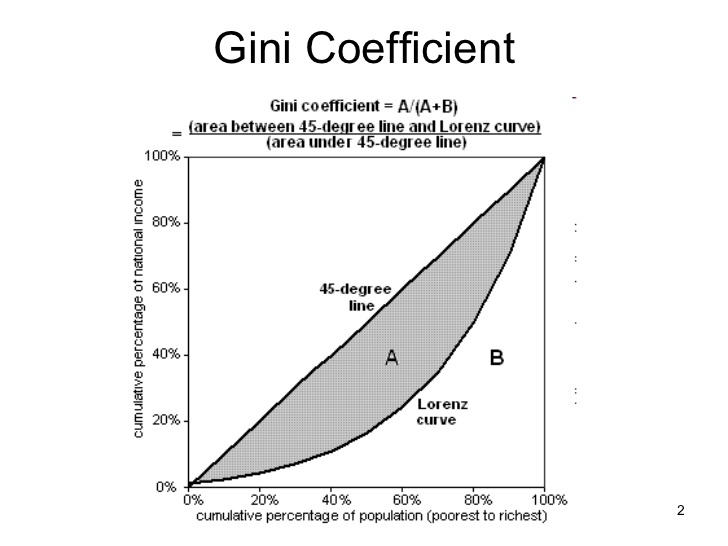

For our axes, since there is not necessarily an analogoue to sorting the population least to most wealthy, we chose to sort the data from earliest acquired to most recetly acquired to show the trend over time. 

#### Lorenz Curve

In [39]:
# sort the data by acquisition date
moma_by_year = moma.sort_values(by=['Acquisition Date'])

# split the DataFrame into 10 (roughly) equal parts to be the 10 deciles (each representing 10% of the population)
# the frist 6 have 13,940 works and the last 4 have 13,939 works
df_split = np.array_split(moma_by_year, 10)
for i in range(0,10):
    
    # add decile number to DataFrame
    df_split[i]["decile"] = i+1
    
    # add decile start and end year to DataFrame
    df_split[i]["dec start year"] = df_split[i]["Acquisition Date"].min().year
    df_split[i]["dec end year"] = df_split[i]["Acquisition Date"].max().year

# combine all of the split DataFrames into one big DataFrame with their corresponding decile number
decile_df = pd.concat([df_split[0],df_split[1],df_split[2],df_split[3],df_split[4],df_split[5],df_split[6],df_split[7],df_split[8],df_split[9]])
decile_df.head()

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Nationality,Birth Year,Death Year,age_made,alive?,Acquisition Year,European?,decile,dec start year,dec end year
61694,59708,Max Reinhardt (Head) (Kopf),3197,Oskar Kokoschka,1919.0,Lithograph,"composition (irreg. ): 15 3/16 x 11 15/16"" (38...",1929-11-19,Gift of Paul J. Sachs,Y,...,Austrian,1886.0,1980.0,33.0,True,1929,True,1,1929,1953
61744,59762,The Lords of the World (Die Herren der Welt ),5260,Georg Scholz,1922.0,Lithograph,"composition: 11 3/4 x 15 3/4"" (29.8 x 40 cm); ...",1929-11-19,Gift of Paul J. Sachs,Y,...,German,1890.0,1945.0,32.0,True,1929,True,1,1929,1953
61711,59728,Dialogue (Zwiesprache),4533,Max Pechstein,1920.0,Woodcut,"composition: 15 13/16 x 12 9/16"" (40.2 x 31.9 ...",1929-11-19,Gift of Paul J. Sachs,Y,...,German,1881.0,1955.0,39.0,True,1929,True,1,1929,1953
61660,59673,"Woman, Standing in the Garden (Frau, im Garten...",3197,Oskar Kokoschka,1916.0,Lithograph,"composition (irreg.): 9 13/16 x 5 11/16"" (24.9...",1929-11-19,Gift of Paul J. Sachs,Y,...,Austrian,1886.0,1980.0,30.0,True,1929,True,1,1929,1953
61635,59646,Marine,1832,Lyonel Feininger,1918.0,Woodcut,"composition (irreg.): 6 5/8 x 8 7/8"" (16.8 x 2...",1929-11-19,Gift of Paul J. Sachs,Y,...,American,1871.0,1956.0,47.0,True,1929,True,1,1929,1953


In [40]:
# find the total number of female artists in each decile
female_list = []
females = decile_df[decile_df["Gender"] == "Female"]
for decile_num in range(1,11):
    female_list.append(females[females["decile"] == decile_num]["Acquisition Date"].count())

In [41]:
# make it cumulative!
total = 0
female_count = [0]
for i in range(10):
    total += female_list[i]
    female_count.append(total)

In [42]:
# since we need a cumulative population, keep a list of the current population being examined at each decile

total = 0
# include 0% of the population in the list of each decile's cumulative population count
pop_count = [0]
for i in range(10):
    total += df_split[i]["Acquisition Year"].count()
    pop_count.append(total)

Since the Gini index depends on cumulative proportions and not counts, we need to find the total proportion of female artists for each cumulative decile. This requires us to divide the number of female artists in each cumulative decile by the total female population.

It will suffice to simply create a list of each decile value because the difference in their size is negligible.

In [43]:
# divide female count by total population of female artists to get the proportion of female artists in each decile
total_female = females["Acquisition Year"].count()
female_prop = list(map(lambda x: (x/total_female) *100, female_count))

# create a list of all of the cumulative proportions of population (make sure to include 0 and 100)
population_prop = [0,10,20,30,40,50,60,70,80,90,100]

In [44]:
# create a DataFrame with these values representing the x and y axis of the Lorenz curve
lorenz_curve = pd.DataFrame(list(zip(population_prop, female_prop)),columns =['cumulative_prop_of_artists', 'cumulative_proportion_of_female_artists'])

In [45]:
# add the start and end years of each decile to the DataFrame
for i in range(0,10):
    decile_df[decile_df["decile"] == i]["dec start year"]
    decile_df[decile_df["decile"] == i]["dec end year"]
    

# create an array of the each unique start and end year to the respective list, including 0 for 0% of the population
start_years = list(decile_df["dec start year"].unique())
start_years.insert(0,0)

end_years = list(decile_df["dec end year"].unique())
end_years.insert(0,0)
start_years

[0, 1929, 1953, 1964, 1968, 1974, 1986, 1998, 2005, 2009, 2013]

In [46]:
# add this to a new DataFrame
lorenz_year = lorenz_curve.copy()
lorenz_year["decile start"] = start_years
lorenz_year["decile end"] = end_years
lorenz_year["date range"] = ["0-0", "1929-1953", "1953-1964", "1964,1968", "1968-1974", "1974-1986","1986-1998", "1998-2005", "2005-2009", "2009-2013", "2013-2016"]
lorenz_year

,cumulative_prop_of_artists,cumulative_proportion_of_female_artists,decile start,decile end,date range
0,0,0.000000,0,0,0-0
1,10,4.831752,1929,1953,1929-1953
2,20,8.083892,1953,1964,1953-1964
3,30,11.833809,1964,1968,"1964,1968"
4,40,17.773943,1968,1974,1968-1974
5,50,26.866662,1974,1986,1974-1986
6,60,45.503418,1986,1998,1986-1998
7,70,58.711090,1998,2005,1998-2005
8,80,76.431937,2005,2009,2005-2009
9,90,90.960377,2009,2013,2009-2013


Here is a dataframe with the cumulative proportion of artists, the cumulative proprtion of female artists, the decile start date, decile end date, and the date range. This provides some context for each decile. 

Text(0.5, 1.0, 'Lorenz Curve and Perfect Equality line')

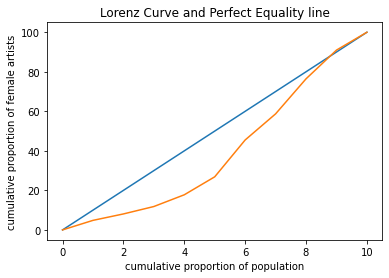

In [47]:
# plot the Lorenz curve
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(lorenz_curve)
ax.set_xlabel("cumulative proportion of population")
ax.set_ylabel("cumulative proportion of female artists")
ax.set_title("Lorenz Curve and Perfect Equality line")

Now we have a graph showing perfect equality (blue line) the Lorenz curve (orange line). The area in between the two lines represents the inequality between the two. The gap decreases in more recent years, showing that there is a more equal distribution of works by female artists in later years, particularly starting in the 8th decile (all works until 2009). Interestingly, in the 9th decile (all works until around 2015) the Lorenz curve actually slightly surpasses perfect equality. This means that the earliest 90% of all artworks contains approximately 91% of the all the works by female artists.

#### Gini Coefficient

To find the Gini Coefficient, we need to integrate the Lorenz curve and the perfect equality line to get the area under the Lorenz curve and the area under the perfect equality line respectively. We then use those values to find the Gini Coefficient.
Mathematically, this is:

Gini Coefficient =  $\frac{\int Perfect Equality Line - \int Lorenz Curve}{\int Perfect Equality Line}$.

In [48]:
# calculate the area under the Lorenz curve
lorenz_area = np.trapz(female_prop, x=population_prop)

# calculate the area under the perfect equality line (y=x)
pe_area = np.trapz(population_prop, x=population_prop)

# use those values to calculate the gini coefficient
gini_coeff = (pe_area - lorenz_area) / pe_area
gini_coeff

0.2180062388000266

We found a Gini coefficient of 21.8. The closer a Gini coefficient is to 0, the closer the data are to perfect equality.

This means there is 21.8 percent concentration of works by female artists in the dataset over time, so works by female artists are generally acquired at lower rate than works are acquired in the general population. However, the graph of the Lorenz curve surpasses perfect equality around the 90th decile, so we can concluded that MoMA has acquired a higher proportion of works by female artists in more recent years.

It is important to remember that the Gini coefficient does not directly compare the percentage of female artists among all artists, but rather shows what percent of the art by female artists were acquired in each decile to show distribution over time

## Linear regression predicting proportion of art by female artists

We used scikit learn to run a linear regression on the data in two different sets:  all of the data and only data before 2012 to see if the model could accurately predict the proportion of female artists.

First, we looked at the regression for all of the data.

In [49]:
# get counts for acquisitions each year
acquisitons_per_year = moma.groupby(['Acquisition Year']).count()

# proportion of art by female artists for each year
female_proportion_by_year = female_per_year["percent_female"]

# create df of year and number of acquisitions
acquisitons_per_year = moma.groupby(['Acquisition Year'])["Artwork ID"].count().to_frame().reset_index().rename({"Artwork ID": "num_works_acquired"},axis=1)

# get a df of year and percent female
all_data = pd.merge(acquisitons_per_year, female_proportion_by_year, on="Acquisition Year").fillna(0)

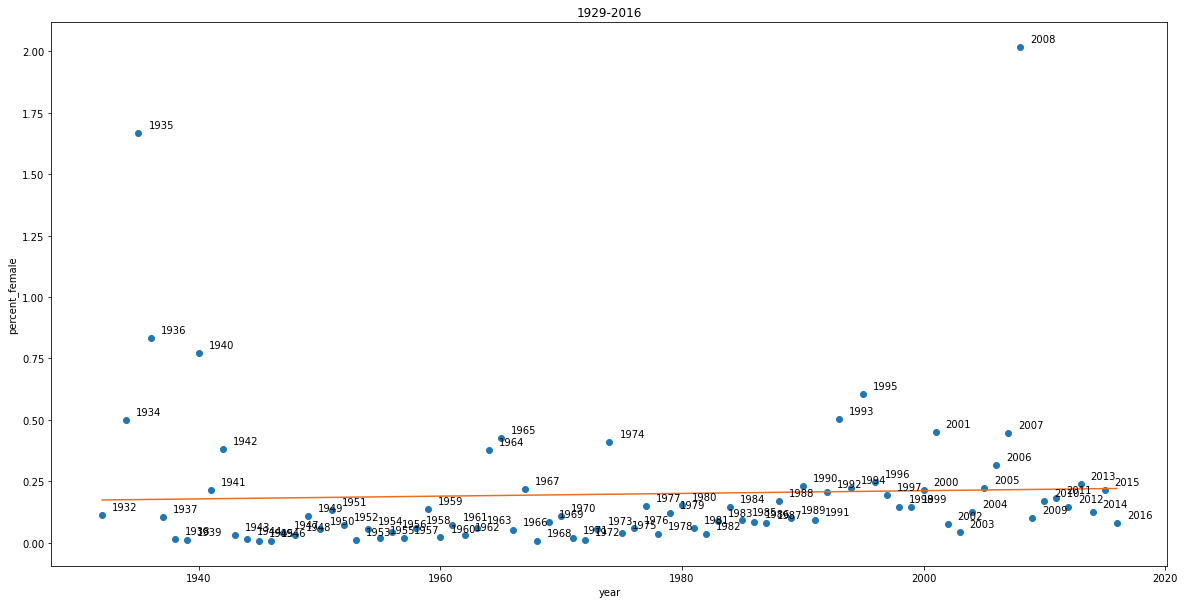

,summary stats
slope,0.0005571
intercept,-0.9030134
r_value,0.0440889
p_value,0.6904676
std_err,0.0013940


In [50]:
x = all_data["Acquisition Year"]
y = all_data["percent_female"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.figure(figsize=(20,10))
plt.plot(x, y, 'o')
plt.plot(x, slope*x + intercept, '#EB6E1F')
plt.title("1929-2016")

x_list = x.tolist()
y_list = y.tolist()

label = all_data["Acquisition Year"]
for i, txt in enumerate(label):
    plt.annotate(txt, (x_list[i], y_list[i]), 
                xytext=(10,5), 
                textcoords='offset points')
    
plt.xlabel("year")
plt.ylabel("percent_female")

plt.show()

# put summary stats into a df column
summary_frame = pd.DataFrame(index=["slope", "intercept", "r_value", "p_value", "std_err"])
summary_stats = ["{:.7f}".format(slope),"{:.7f}".format(intercept),"{:.7f}".format(r_value),"{:.7f}".format(p_value), "{:.7f}".format(std_err)]
summary_frame["summary stats"] = summary_stats
summary_frame

For the next linear regression, we only provided the model with the data up to but not including 2012 to see what it's predictions would be for 2012 onward.

In [51]:
# get only the pre 2012 percent of female artists
pre_2012 = acquisitons_per_year[acquisitons_per_year["Acquisition Year"] < 2012]
pre_2012 = pd.merge(pre_2012, female_proportion_by_year, on="Acquisition Year")
pre_2012.rename(columns={"Acquisition Date" : "percent_female"},inplace=True)

# some of the earlier years did not have any works by female artists, so fill the NaNs with 0s
pre_2012 = pre_2012.fillna(0).drop("Artwork ID",1,errors="ignore")


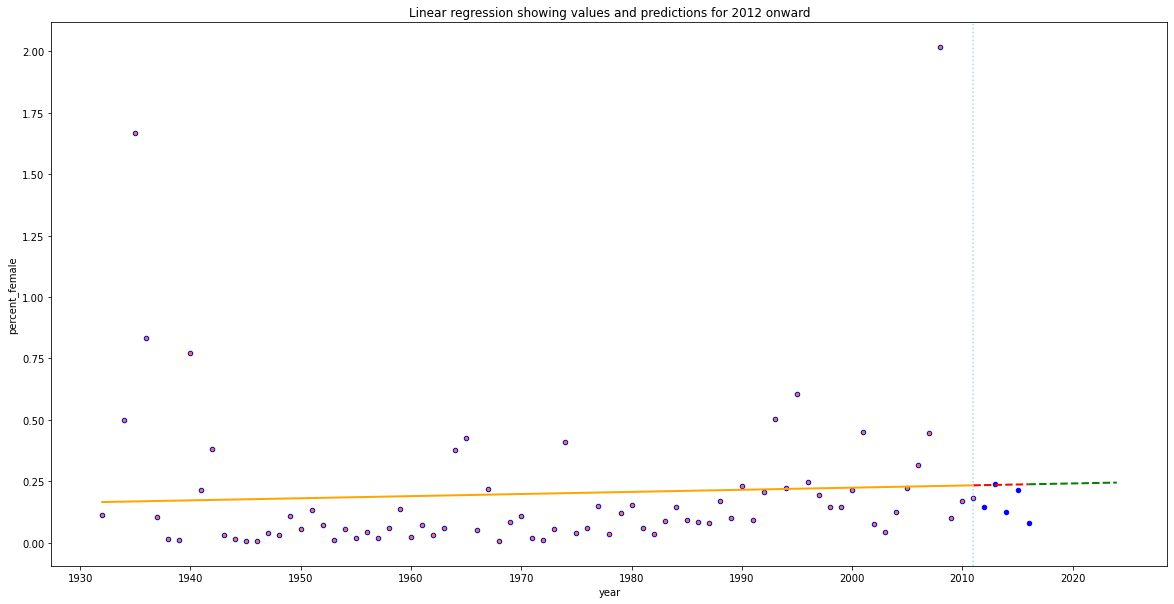

MSE is 0.0015731544155657298
RMSE is 0.03966301067198164


,summary stats
slope,0.0008616
intercept,-1.4998321
r_value,0.0622949
p_value,0.5854827
std_err,0.0015732


In [52]:
# the feature we are looking at is the year a work was acquired
X = pre_2012["Acquisition Year"]

# we are using this to predict the percent of artworks by female artists
y = pre_2012["percent_female"]

# run a linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# use the slope to graph the best fit line
line = [slope*p + intercept for p in X]

fig, ax = plt.subplots(figsize=(20, 10))

# graph the line and the points
ax.scatter(all_data["Acquisition Year"], all_data["percent_female"], s = 20, color = 'blue')
ax.plot(X, line, color = 'orange', linewidth=2)

# add more years 
test_years = np.arange(2011, 2017, 1) # representing 2012-2017
predict_years = np.arange(2016, 2025, 1)# predicting 2017-2020


# calculate the predicted line
t_line = [slope*x + intercept for x in test_years] 
p_line = [slope*x + intercept for x in predict_years] 

# plot test line
ax.plot(test_years, t_line, color = 'red', linewidth=2, ls='--')
ax.scatter(X, y, s = 5)

# plot prediction line
ax.plot(predict_years, p_line, color = 'green', linewidth=2, ls='--')
ax.scatter(X, y, s = 5)

# format plot
plt.xticks(range(1930, 2021, 10))
plt.xlabel("year")
plt.ylabel("percent_female")
plt.title("Linear regression showing values and predictions for 2012 onward")
plt.axvline(x=2011, ls=':', color='#add8e6')
plt.show()


# calculate root of mean standard error
mse = std_err.mean()
rmse = np.sqrt(mse).mean()
print("MSE is " + str(mse))
print("RMSE is " + str(rmse))

# put summary stats into a df column
summary_frame = pd.DataFrame(index=["slope", "intercept", "r_value", "p_value", "std_err"])
summary_stats = ["{:.7f}".format(slope),"{:.7f}".format(intercept),"{:.7f}".format(r_value),"{:.7f}".format(p_value), "{:.7f}".format(std_err)]
summary_frame["summary stats"] = summary_stats
summary_frame

The points represent the proportion of female artists for a given year. The organge line is the best fit line found with the liner regression that represents the expected value  for each year. The red line is the section that we used to test the line with data that we knew but did not include in the dataframe that the linear regression is based on. The green segment represents the projected future data until 2025.

In 2012, the regression line underestimates the proportion of female artists, but for all of the other known years after 2012, it overestimates it, with the exception of 2017 which is more or less predected accurately. 

While the line predicted a general fairly solid increase in the proportion, from 2012 onward the actual data trended downward. While there is still a positive cooreletion overall, this does support our findings that the MoMA could have acquired more works be female artists to make an even greater difference.

Both datasets showed a fairly strong positive correlation between year and gender, meaning that the proportion of female artists increases as year increases. This helps support the claim that MoMA did improve gender diversity, but it does not necessarily mean causation. However, the more recent years actually caused the correlation to go down slightly, showing that MoMA not consistently increasing the proportion. In the last year for which we have data, the percentage did increase from the previous year.

## Tate Data Extraction, Cleaning, and Loading

In order to do through analysis we should compare the MoMA's data to data from other museums. The first museum that we will examine is the Tate, another museum for modern and contemporary art located in London, England.

In [53]:
tate_artworks = pd.read_csv("artwork_data-tate.csv", low_memory = False)
tate_artists = pd.read_csv("artist_data-tate.csv", low_memory = False)

In [54]:
display(tate_artworks.head())
tate_artists.head() 

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,1922.0,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN,http://www.tate.org.uk/art/artists/ivor-abraha...


After examining the data set you can see they have a lot of different columns that are not needed because of their repetition, or because we won't be using them in the future. So we created new data sets without them below.

In [55]:
tate_newartist = tate_artists[['name','gender','placeOfBirth','yearOfBirth','yearOfDeath']]

In [56]:
tate_newartworks = tate_artworks[['id','accession_number','artist','artistRole','artistId','title','medium','year'
                                 ,'acquisitionYear','dimensions']]

Next we merged the artist and the artworks data together, in the artist dataset the artist column is called artists, and in the artworks it is called name. We merged this on left so that if there is an artist who doesn't have an artwork they don't show up.

In [57]:
tate = tate_newartworks.merge(tate_newartist, left_on = ['artist'],right_on = ['name'], how = 'left')

Then we dropped the name column because we would no longer need it

In [58]:
tate = tate.drop(columns = ['name'])

Then, like we did for the MoMA, we removed the rows where the acquisition year was not present. 

In [59]:
no_date = tate[(tate['acquisitionYear'].isnull() == True)].index
tate.drop(no_date, inplace = True)

When examining the dates we noticed that they were not as wonky as the other one so we only had to change two dates.

In [60]:
tate['year'].unique()

array([nan, '1785', '1826', '1828', '1825', '1803', '1794', '1789',
       '1786', '1800', '1790', '1805', '1779', '1870', '1871', '1866',
       '1877', '1873', '1872', '1879', '1875', '1862', '1863', '1861',
       '1880', '1821', '1840', '1846', '1874', '1860', '1852', '1850',
       '1845', '1844', '1827', '1829', '1831', '1830', '1812', '1814',
       '1869', '1881', '1851', '1843', '1864', '1865', '1788', '1876',
       '1858', '1859', '1849', '1885', '1818', '1893', '1806', '1837',
       '1810', '1807', '1808', '1809', '1811', '1816', '1822', '1833',
       '1817', '1931', '1959', '1916', '1917', '1951', '1900', '1899',
       '1902', '1953', '1933', '1974', '1819', '1820', '1967', '1969',
       '1979', '1983', '1989', '1992', '1993', '1994', '1997', '1998',
       '1999', '2000', '1981', '1985', '1996', '1991', '1971', '2004',
       '2002', '2005', '2006', '1975', '2001', '1973', '2003', '1963',
       '1976', '1977', '1960', '1990', '1988', '2007', '1964', '1970',
       '1

In [61]:
tate['year'].replace({'no date':np.nan, 'c.1997-9':1997}, inplace = True)

Next we made three new columns similar to the ones we made for the MoMA, one that is the age of the person when they made the work, one that will tell if a person was alive or not when the work was acquired by the Tate, and one representing the person's nationality

In [62]:
tate['age_made'] = pd.to_numeric(tate['year']) - tate['yearOfBirth']
tate['alive?'] = tate['year']

Finally we utilized the same function and apply method as we did above to make a column determining if the artist was alive or not.

In [63]:
def alive(acquisition,death):
    if acquisition > death:
        return 'False'
    else:
        return 'True'
tate['alive?'] = tate.apply(lambda row: alive(row['acquisitionYear'],row['yearOfDeath']),axis=1)

Next, before we could start making a new column for the Tate to represent nationality we noticed that the placeOfBirth column contained both the city and the country for the majority of the artists. We realized that in order to analyze the country that the artists were from we needed to separate the city from the country, so we made a new column called countryOfOrigin that contained just the country.

In [64]:
def country(place):
    new = str(place).split(',')
    if len(new) > 1:
        first = re.sub(r"^\s+", "", new[1])
        return first
    else:
        return new[0]
tate['countryOfOrigin'] = tate.apply(lambda row: country(row['placeOfBirth']), axis=1)

The names of the countries for the Tate dataset were especially difficult to work with beacuse of the number of differences in the name titles. The majority of the names were in the countries native language or there was a city name rather than a country, which you can see below. Because of this we had to manually go through and check for what we wanted by looking at the unique values and then adding them to the list. 

In [65]:
tate['countryOfOrigin'].unique()

array(['United Kingdom', 'nan', 'Bharat', 'France', 'Italia', 'Viet Nam',
       'Deutschland', 'Rossiya', 'United States', 'Bahamas', 'Australia',
       'Ellás', 'België', 'Latvija', 'Canada', 'Éire', 'Schweiz',
       'Plymouth', 'Edinburgh', 'España', 'Nederland', 'Beckington',
       'Perth', 'Wimbledon', 'Canterbury', 'Danmark', 'Türkiye',
       'Österreich', 'Blackheath', 'Charlieu', 'Isle of Man',
       'Magyarország', 'Hrvatska', 'Chile', 'Epsom', 'Auteuil',
       'Kensington', 'South Africa', 'Mauritius', 'Rochdale', 'Melmerby',
       'Ukrayina', 'Sverige', 'Département de la', 'New Zealand',
       'România', 'Otok', 'Charlotte Amalie', 'Schlesien', 'Saint Hélier',
       'Polska', 'Misr', 'Bermondsey', 'Egremont', 'Norge', 'Braintree',
       'Liverpool', 'Belarus', 'Stoke on Trent', 'Zhonghua', 'Portugal',
       'Cuba', 'Moldova', 'Singapore', 'Nihon', 'Brasil', 'Staten Island',
       'México', 'Bosna i Hercegovina', 'Slovenija',
       'Slovenská Republika', 'Ceská 

First we replaced "nan" with np.nan and then we created a new dataframe that didn't contain any np.nans for country of origin

In [66]:
tate['countryOfOrigin'] = tate['countryOfOrigin'].replace({'nan':np.nan})
tate_country = tate[tate['countryOfOrigin'].isnull() == False]
#designation wasn't properly set so had to remove the works that didn't have a country of origin

Next we created a list of the countries, a function to make a new column and insert true or false if it was a european country or not.

In [67]:
index = tate_country['countryOfOrigin'].index
tate_country['European?'] = ['False'] * len(index)

In [68]:
countries_tate = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Germany',
'Greece','Hungary','Ireland','Italy','Latvia','Luxembourg','Lithuania','Malta','Netherlands','Poland','Portugal',
'Romania','Slovak Republic','Slovenia','Spain','Sweden','United Kingdom', 'Deutschland', 'Italia','London','Ceská Republika',
 'D.C.',  'Staten Island','Liverpool', 'Polska', 'România', 'España', 'Edinburgh', 'Canada','United States', 'Stoke on Trent',
                 'Ellás','België', 'Latvija','Nederland','Wimbledon','Canterbury', 'Danmark','Österreich','Blackheath',
                  'Bermondsey', 'Egremont', 'Norge', 'Braintree','Liverpool','Bristol','Eesti','Hertfordshire', 'Stockholm', 'Luxembourg'
                 ]
non_european = []
european = []

def nation(nation):
    if nation in countries_tate:
        return 'True'
    elif nation == np.nan:
        return np.nan 
    else:
        if nation in non_european:
            return 'False'
        else:
            non_european.append(nation)
            return 'False'
            
tate_country['European?'] = tate_country.apply(lambda row: nation(row['countryOfOrigin']),axis=1)

After each of those steps our dataframe is now clean and in the format that we want it in, which is displayed below.

In [69]:
tate_country

,id,accession_number,artist,artistRole,artistId,title,medium,year,acquisitionYear,dimensions,gender,placeOfBirth,yearOfBirth,yearOfDeath,age_made,alive?,countryOfOrigin,European?
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,support: 394 x 419 mm,Male,"London, United Kingdom",1762.0,1787.0,NaN,False,United Kingdom,True
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,support: 311 x 213 mm,Male,"London, United Kingdom",1762.0,1787.0,NaN,False,United Kingdom,True
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,support: 343 x 467 mm,Male,"London, United Kingdom",1762.0,1787.0,23.0,False,United Kingdom,True
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,support: 318 x 394 mm,Male,"London, United Kingdom",1762.0,1787.0,NaN,False,United Kingdom,True
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,image: 243 x 335 mm,Male,"London, United Kingdom",1757.0,1827.0,69.0,False,United Kingdom,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69313,122959,T13864,"P-Orridge, Genesis",artist,16646,It’s That Time Of The Month (from Tampax Romana),"Wood, Perspex, clock case, tampons and human b...",1975,2013.0,object: 305 x 305 x 135 mm,Male,"Manchester, United Kingdom",1950.0,NaN,25.0,True,United Kingdom,True
69314,122960,T13865,"P-Orridge, Genesis",artist,16646,Larvae (from Tampax Romana),"Perspex, Wood, hairpiece, tampon and human blood",1975,2013.0,object: 305 x 305 x 135 mm,Male,"Manchester, United Kingdom",1950.0,NaN,25.0,True,United Kingdom,True
69315,122961,T13866,"P-Orridge, Genesis",artist,16646,Living Womb (from Tampax Romana),"Wood, Perspex, plastic, photograph on paper, t...",1976,2013.0,object: 305 x 305 x 135 mm,Male,"Manchester, United Kingdom",1950.0,NaN,26.0,True,United Kingdom,True
69316,121181,T13867,"Hatoum, Mona",artist,2365,Present Tense,Soap and glass beads,1996,2013.0,displayed: 45 x 2410 x 2990 mm,Female,"Bayrut, Al-Lubnan",1952.0,NaN,44.0,True,Al-Lubnan,False


## Analysis: Tate vs MoMA

Now that the datasets are in similar formats we can start comparisons and anaylsis. But, the Tate data stopped collecting in 2013, so need to make MoMA align with them.

In [70]:
tate_country['acquisitionYear'].max()

2013.0

In [71]:
# create a new DataFrame of all of the works before 2013
d = datetime.datetime(2014, 1, 1)
moma_before_2013 = names_dates_moma[names_dates_moma['Acquisition Date'] < d]
moma_after_2013 = names_dates_moma[names_dates_moma['Acquisition Date'] > d]

### How does the diversity of the two museums compare?

#### Comparing Western vs non-Western Art in each museum

The first visualization that we made, compares the diversity of the artists at both the Tate and the MoMA by looking at how many artists are Western or non-Western.

In [72]:
# get the counts of works by Western and non-Western artists in MoMA before 2013
moma_European = moma_before_2013['European?'].value_counts()

Text(0.5, 1.0, 'Lorenz Curve and Perfect Equality line')

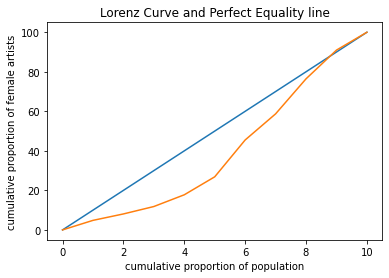

In [73]:
# get the counts of works by Western and non-Western artists in the Tate
tate_European = tate_country['European?'].value_counts()

# plot the Lorenz curve
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(lorenz_curve)
ax.set_xlabel("cumulative proportion of population")
ax.set_ylabel("cumulative proportion of female artists")
ax.set_title("Lorenz Curve and Perfect Equality line")

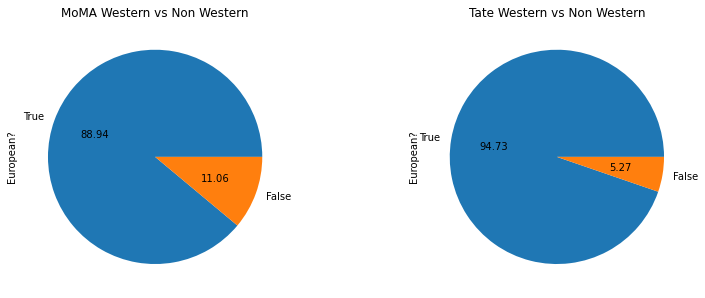

In [74]:
# create and format pie charts
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

moma_European.plot.pie(ax=ax1,  autopct='%.2f')
ax1.set_title("MoMA Western vs Non Western")

tate_European.plot.pie(ax=ax2, autopct='%.2f')

ax2.set_title("Tate Western vs Non Western")

fig.subplots_adjust(wspace=.5)
fig.set_figheight(12)
fig.set_figwidth(12)




<strong> Conclusion: </strong> This comparison shows that the MoMA, even before its renovation, was ahead of the Tate with regard to artists who were not of European or Western descent.

### Comparing Art by Male vs Female artists in each museum

Next we chose to look at the differences in sizes of the male and female population at both the Tate and the MoMA, as this was another area that the MoMA was striving the improve.

In [75]:
# get the counts of works by male and female artists in MoMA before 2013
moma_gender = moma_before_2013['Gender'].value_counts()

In [76]:
# get the counts of works by male and female artists in the Tate
tate_gender = tate_country['gender'].value_counts()

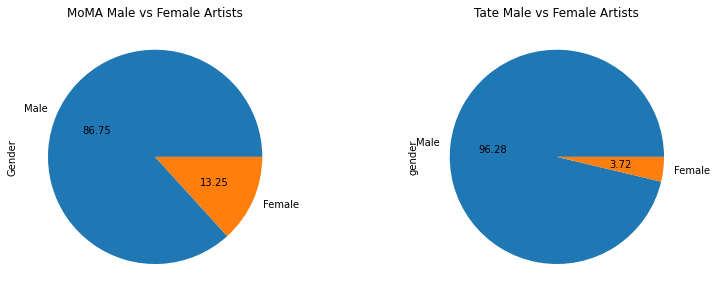

In [77]:
# create and format pie charts
fig = plt.figure()
ax3 = fig.add_subplot(1,2,1)
ax4 = fig.add_subplot(1,2,2)
moma_gender.plot.pie(ax=ax3, autopct='%.2f')
ax3.set_title("MoMA Male vs Female Artists")

tate_gender.plot.pie(ax=ax4, autopct='%.2f')
ax4.set_title("Tate Male vs Female Artists")

fig.subplots_adjust(wspace=.5)
fig.set_figheight(12)
fig.set_figwidth(12)

<strong> Conclusion: </strong>This is an interesting comparison, as it once again shows that the MoMA has a greater diversity than the Tate did before its renovation, as it has a much larger proportion of female artists to male artists.

### Comparing Art by Male vs Female artists of non-Western art in each museum

What about the male/female ratio when looking at non-European/Western artists? 


In [78]:
# get the counts of Western and non-Western works by gender in MoMA before 2013
moma_western_gender = moma_before_2013[moma_before_2013['European?'] == 'False']['Gender'].value_counts()

In [79]:
# get the counts of Western and non-Western works by gender in the Tate
tate_western_gender = tate_country[tate_country['European?'] == 'False']['gender'].value_counts()

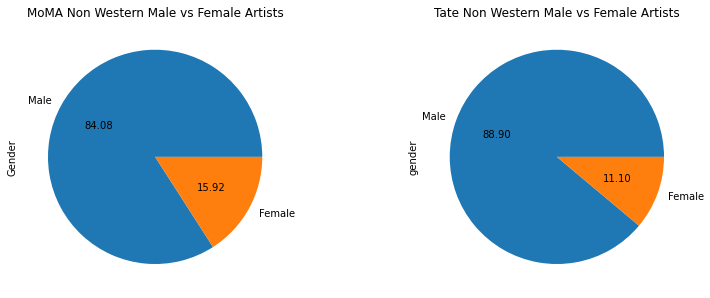

In [80]:
# create and format pie charts
fig = plt.figure()
ax5 = fig.add_subplot(1,2,1)
ax6 = fig.add_subplot(1,2,2)
moma_western_gender.plot.pie(ax=ax5, autopct='%.2f')
ax5.set_title("MoMA Non Western Male vs Female Artists")

tate_western_gender.plot.pie(ax=ax6, autopct='%.2f')
ax6.set_title("Tate Non Western Male vs Female Artists")

fig.subplots_adjust(wspace=.5)
fig.set_figheight(12)
fig.set_figwidth(12)

<strong>Conclusion: </strong> The data shows that  MoMA has a larger of female non-Western/european artists than the Tate, but this difference is smaller than the one above.


### Do countries favor their own art over foreign art? Could this be a bias towards American or British art across many museums?

We next examined the proportion of British works in the Tate, the proportion of American works in the MoMA, the proportion of American works in the Tate, and the proportion of British works in MoMA to see if the museums tended to collect more work created by artists from their respective countries or if there was a significant bias towards American art in the Tate or British art in MoMA.

In [81]:
# find the proportion of British works in the Tate
tate_country = tate_country.assign(British=np.where(tate_country['countryOfOrigin']=="United Kingdom", True, False))
tate_British_prop = (tate_country["British"] == True).mean()

In [82]:
# Find the proportion of American art in MoMA
names_dates_moma = names_dates_moma.assign(American=np.where(names_dates_moma['Nationality']=="American", True, False))
moma_American_prop = (names_dates_moma["American"] == True).mean()

In [83]:
# Find the proportion of British art in MoMA
names_dates_moma = names_dates_moma.assign(British=np.where(names_dates_moma['Nationality']=="British", True, False))
moma_British_prop = (names_dates_moma["British"] == True).mean()

In [84]:
# find the proportion of American works in the Tate
tate_country = tate_country.assign(American=np.where(tate_country['countryOfOrigin']=="United States", True, False))
tate_American_prop = (tate_country["American"] == True).mean()

<AxesSubplot:title={'center':'Examining National Biases in MoMA and the Tate'}>

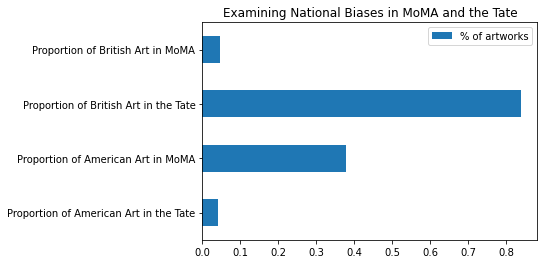

In [85]:
# Graph it!
plotdata = pd.DataFrame(
    {"% of artworks": [tate_American_prop, moma_American_prop, tate_British_prop, moma_British_prop]}, 
    index=["Proportion of American Art in the Tate", "Proportion of American Art in MoMA", "Proportion of British Art in the Tate", "Proportion of British Art in MoMA"])
plotdata.plot(kind="barh", title = "Examining National Biases in MoMA and the Tate")

<strong>Conclusion:</strong> It looks like both MoMA and the Tate favor art from their home country, with the Tate having a higher percentage of British art than MoMA has American art. There is roughly the same proportion of British art in MoMA as there is American art in the Tate.

### Examining gender and home country bias in the two museums
How does the gender ratio look when examining art from the museum's home country?

In [86]:
# Proportion of Male American Artists
american_males_moma = (names_dates_moma['American'] == True) & (names_dates_moma['Gender']  == "Male")
american_males_moma_prop = american_males_moma.mean()

In [87]:
# Proportion of Male non-American Artists
nonamerican_males_moma = (names_dates_moma['American'] == False) & (names_dates_moma['Gender']  == "Male")
nonamerican_males_moma_prop = nonamerican_males_moma.mean()

In [88]:
# Proportion of Female American Artists
american_females_moma = (names_dates_moma['American'] == True) & (names_dates_moma['Gender']  == "Female")
american_females_moma_prop = american_females_moma.mean()

In [89]:
# Proportion of Female non-American Artists
nonamerican_females_moma = (names_dates_moma['American'] == False) & (names_dates_moma['Gender']  == "Female")
nonamerican_females_moma_prop = nonamerican_females_moma.mean()

In [90]:
# Proportion of Male British Artists
british_males_tate = (tate_country['British'] == True) & (tate_country['gender']  == "Male")
british_males_tate_prop = british_males_tate.mean()

In [91]:
# Proportion of Male non-British Artists
nonbritish_males_tate = (tate_country['British'] == False) & (tate_country['gender']  == "Male")
nonbritish_males_tate_prop = nonbritish_males_tate.mean()

In [92]:
# Proportion of Female British Artists
british_females_tate = (tate_country['British'] == True) & (tate_country['gender']  == "Female")
british_females_tate_prop = british_females_tate.mean()

In [93]:
# Proportion of Feale non-British Artists
nonbritish_females_tate = (tate_country['British'] == False) & (tate_country['gender']  == "Female")
nonbritish_females_tate_prop = nonbritish_females_tate.mean()

<AxesSubplot:title={'center':'Examining National Biases in the Tate'}>

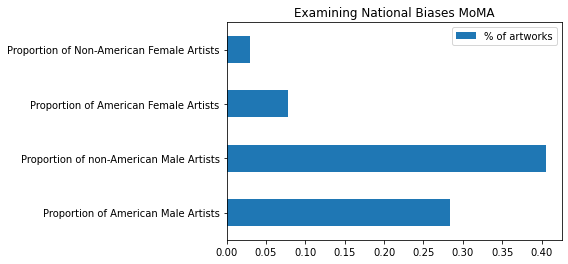

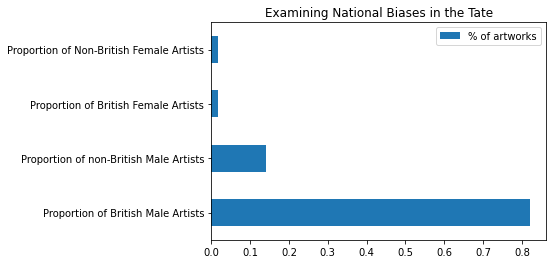

In [94]:
# Graph MoMA data!
plotdata_moma = pd.DataFrame(
    {"% of artworks": [american_males_moma_prop, nonamerican_males_moma_prop, american_females_moma_prop, nonamerican_females_moma_prop]}, 
    index=["Proportion of American Male Artists", "Proportion of non-American Male Artists", "Proportion of American Female Artists", "Proportion of Non-American Female Artists"])
plotdata_moma.plot(kind="barh", title = "Examining National Biases MoMA")

# Graph Tate data!
plotdata_tate = pd.DataFrame(
    {"% of artworks": [british_males_tate_prop, nonbritish_males_tate_prop, british_females_tate_prop, nonbritish_females_tate_prop]}, 
    index=["Proportion of British Male Artists", "Proportion of non-British Male Artists", "Proportion of British Female Artists", "Proportion of Non-British Female Artists"])
plotdata_tate.plot(kind="barh", title = "Examining National Biases in the Tate")

Conclusion: Both museums favored male artists, but MoMA has a higher proportion of non-American art than it has American art by male artists, while the Tate heavily favors British male artists. In terms of female artists, MoMA favors American over non-American artists while the Tate doesn't have a distinct difference between British and non-British female artists.

## Met Data Extraction, Cleaning, and Loading

The second museum that we are comparing to the MoMA is the Met, which we first extract the data from the csv that was located on their github page.

In [95]:
met = pd.read_csv("MetObjects.csv", low_memory = False)

FileNotFoundError: [Errno 2] No such file or directory: 'MetObjects.csv'

The Met dataset has a lot of columns that we don't need to compare with the MoMA, so we drop them below

In [ ]:
met.drop(columns = ['Object Number','Is Highlight','Is Timeline Work','Is Public Domain','Object ID',
                          'Gallery Number','Dynasty', 'Reign',
       'Portfolio', 'Constiuent ID', 'Artist Role', 'Artist Prefix','Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort','Artist ULAN URL',
       'Artist Wikidata URL','Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL'], inplace = True)

The Met as a museum itself contains multiple differnt departments and isn't only modern and contemporary art, so we filter based on department to only look at the modern and contemporary art that the Met has.

In [ ]:
met_modern = met[met['Department'] == 'Modern and Contemporary Art']

Next we drop the rows that don't have an Accession year, and filter for the years that are before 2017, as the MoMA dataset only goes up to 2017 but the Met is frequently updated and has works acquired in 2020 in its dataset.

In [ ]:
met_modern = met_modern.dropna(subset=['AccessionYear'])
met_modern['AccessionYear'] = met_modern['AccessionYear'].astype(int)
met_before_2017 = met_modern[met_modern['AccessionYear'] < 2017]

In [ ]:
met_before_2017['Artist Begin Date'] = met_before_2017['Artist Begin Date'].replace(np.nan,'no')
met_before_2017['Artist End Date'] = met_before_2017['Artist End Date'].replace(np.nan,'no')

After filtering we then looked at different columns that we had noticed original problems with, for instance, Artist Nationality, which is displayed below, sometimes has multiple nationalities in the column that are divided with a '|' and then on the other side of the '|' there are sometimes even more nationalities sepearted by a ','. When examining the columns we noticed that the majority of the time the first nationality was the one that they were born with while the other ones were the country that they died in or lived their later life in. Because of this we chose to pick the first nationality every time.

In [ ]:
display(met_before_2017['Artist Nationality'].unique())
met_before_2017['Artist Nationality'] = met_before_2017['Artist Nationality'].replace(np.nan,'no')

In [ ]:
index = met_before_2017['Artist Nationality'].index
for x in index:
    if met_before_2017.loc[x,'Artist Nationality'] != 'no':
        if 'born' in met_before_2017.loc[x,'Artist Nationality']:
            b = met_before_2017.loc[x,'Artist Nationality'].split(' ')
            born = b[-1]
            if '|' in born:
                n = born.split('|')
                met_before_2017.loc[x,'Artist Nationality'] = n[0]
            else:
                met_before_2017.loc[x,'Artist Nationality'] = born
        elif '|' in met_before_2017.loc[x,'Artist Nationality']:
            if 'born' in met_before_2017.loc[x,'Artist Nationality']:
                n = met_before_2017.loc[x,'Artist Nationality'].split(',')
                met_before_2017.loc[x,'Artist Nationality'] = n[0]
            else:
                n = met_before_2017.loc[x,'Artist Nationality'].split('|')
                met_before_2017.loc[x,'Artist Nationality'] = n[0] 
met_before_2017['Artist Nationality'] = met_before_2017['Artist Nationality'].replace('no',np.nan)

In [ ]:
index = met_before_2017['Artist Begin Date'].index
met_before_2017['Artist Begin Date'].astype(str)
for x in index:
    if met_before_2017.loc[x,'Artist Begin Date'] != np.nan:
        if '|' in met_before_2017.loc[x,'Artist Begin Date']:
            n = met_before_2017.loc[x,'Artist Begin Date'].split('|')
            met_before_2017.loc[x,'Artist Begin Date'] = n[0]

In [ ]:
index = met_before_2017['Artist End Date'].index
met_before_2017['Artist End Date'] = met_before_2017['Artist End Date'].astype(str, copy=True, errors='raise')
for x in index:
    if met_before_2017.loc[x,'Artist End Date'] != np.nan:
        if '|' in met_before_2017.loc[x,'Artist End Date']:
            n = met_before_2017.loc[x,'Artist End Date'].split('|')
            met_before_2017.loc[x,'Artist End Date'] = n[0]

Next we tried to clean the values in the Artist Gender column, but upon further inspection the column doesn't contain any usable information. It is a mix of | and only Female, which although it would be interesting to learn that the Met only had modern and contemporary works of art by female artists we know that this is not true. We displayed the different unique values, and the mess that is their Artist Gender column. Because of this we will not be able to do the same analysis of the Met vs the MoMA on gender like we did above for the MoMA vs the Tate.

In [ ]:
met['Artist Gender'].unique()

## Analysis: Met vs MoMA

Unlike the Tate the Met doesn't have a usable gender column so we won't be able to conduct quite as much analysis as we did with the Tate, but we can still compare the diversity of the two museums based on the nationality of the artists.

#### Comparing Western vs non-Western Art in each museum

First we take out the colums where there isn't a nationality for the artist.

In [ ]:
met_country_before2017 = met_before_2017[met_before_2017['Artist Nationality'] != 'no']

Then we examine the different nationalities and compire the ones that are Western nationalities into a list.

In [ ]:
met_country_before2017['Artist Nationality'].unique()

With this list we can filter and create a new column like we did before for the Tate and the MoMA to determine if the artist is European or not.

In [ ]:
countries_met = ['American', 'Spanish', 'German', 'French', 'British', 'Austrian',
       'Hungarian', 'American ', 'British, Scottish','Italian','Czech','Norwegian', 'Swedish','Finnish',
       'Belgian','Canadian', 'Dutch', 'Romanian','Danish', 'Swiss','Rumanian',
       'Czechoslovakian', 'Irish', 'Polish','Yugoslavian','American and French','American German',
                 'France', 'Portuguese', 'Denmark','Slovakian','Danish-Icelandic','Icelandic']
non_european = []
met_country_before2017['European'] = ['False'] * len(met_country_before2017['Artist Nationality'])
index = met_country_before2017['Artist Nationality'].index

for x in index:
    if met_country_before2017.loc[x, 'Artist Nationality'] in countries_met:
        met_country_before2017.loc[x,'European?'] = 'True'
    elif met_country_before2017.loc[x, 'Artist Nationality'] == np.nan:
        met_country_before2017.loc[x,'European?'] = 'True' 
    else:
        if met_country_before2017.loc[x, 'Artist Nationality'] in non_european:
            met_country_before2017.loc[x,'European?'] = 'False'
        else:
            non_european.append(met_country_before2017.loc[x, 'Artist Nationality'])
            met_country_before2017.loc[x,'European?'] = 'False'

Next we can create a visualization comparing the MoMA to the Met like we did for the Tate

In [ ]:
# get the counts of works by Western and non-Western artists in MoMA before 2013
moma_European = names_dates_moma['European?'].value_counts()

In [ ]:
# get the counts of works by Western and non-Western artists in the Met
met_European = met_country_before2017['European?'].value_counts()

In [ ]:
# create and format pie charts
fig, (ax1, ax2) = plot.subplots(1, 2)
moma_European.plot.pie(ax=ax1,  autopct='%.2f')
ax1.set_title("MoMA Western vs Non Western")

met_European.plot.pie(ax=ax2, autopct='%.2f')
ax2.set_title("Met Western vs Non Western")

fig.subplots_adjust(wspace=.5)
fig.set_figheight(12)
fig.set_figwidth(12)

In [ ]:
met_country_before2017

<strong> Conclusion: </strong> This comparison shows that the MoMA, even before its renovation, was ahead of the Met with regard to artists of modern and contemporary art who were not of European or Western descent.

### Proportion of American vs Non American Works for the MoMA and the Met

One final comparison that we can look at is how the proportion of American vs Non-American differs between the MoMA and the Met as two large American museums.

In [ ]:
#Create new columns that assigns a true or false value to show if the work is by an American or not
names_dates_moma = names_dates_moma.assign(American=np.where(names_dates_moma['Nationality']=="American", True, False))
met_country_before2017 = met_country_before2017.assign(American=np.where(met_country_before2017['Artist Nationality']=="American", True, False))

#Calculate the mean of the number of American and the Non-American artists for the MoMA
american_moma = (names_dates_moma['American'] == True)
american_moma_num = american_moma.mean()
nonamerican_moma = (names_dates_moma['American'] == False)
nonamerican_moma_num = nonamerican_moma.mean()

#Calculate the mean of the number of American and the Non-American artists for the Met
america_met_before_2017 = (met_country_before2017['American'] == True)
american_met_before_2017 = america_met_before_2017.mean()
nonamerica_met_before_2017 = (met_country_before2017['American'] == False)
nonamerican_met_before_2017 = nonamerica_met_before_2017.mean()

In [ ]:
# Graph MoMA data!
plotdata_moma = pd.DataFrame(
    {"% of artworks": [american_moma_num,nonamerican_moma_num]}, 
    index=['Proportion of American Artists in the MoMA','Proportion of Non-American Artists in the MoMA'])
plotdata_moma.plot(kind="barh", title = "Examining National Biases MoMA")

# Graph Met data!
plotdata_tate = pd.DataFrame(
    {"% of artworks": [american_met_before_2017,nonamerican_met_before_2017]}, 
    index=['Proportion of American Artists in the Met','Proportion of Non-American Artists in the Met' ])
plotdata_tate.plot(kind="barh", title = "Examining National Biases in the Met")

<strong>Conclusion</strong>: The MoMA out preforms the Met in diversity by having a larger number of Non-American works to American works. This shows that the MoMA as a museum places more emphasis on acquiring and retaining works from outside of America and more representational of the world as a whole. Through this, when compared to the Met, the MoMA is keeping their goal of diversifying the canon.

# Final Conclusion

We feel confident in saying that MoMA has accomplised their goal of increasing diversity. While we don't have all of the acquisitions up to the end of the renovation in 2019, we are confident based on trends and predictions that MoMA did a good job of diversifying their collection. Patterns in the data suggest that MoMA is becoming more diverse in the key areas they defined: gender, nationality, and modernity of works.


However, there were some limitations of our analysis. There was not a lot of personal information about the artists, which limited the amount of features we were able to examine. For example, we do not have information about whether or not they acquired works from more LGBTQ artists or artists of different socieoeconomic backgrounds. While we did have information about the artist's nationality, nationality can be conplex and definied in different ways. Nationality could mean the artist's country of origin or the country where the artist resides, or an artist could identify with multiple nationalities.

Additionally, nationality is not necessarily an indication of the artist's race or ethnicity. Using nationality would not make a distinction between Black Americans, Asian Americans, Indiginous Americans, and Hispanic and Latino Americans, which is not reflective of the actual diversity of the American artists. 

As we previously mentioned, we do not have the most recent data from the final years of the rennovation, so we cannot see the final statistics, but we still feel confident based on the intent and numbers from the data we have. 

The comparison with both the Tate and the Met further confirms MoMA's commitment to diversity. Even before the second rennovation was completed, MoMA already surpassed the Tate and the Met in the key categories of diversity that we were able to measure. The range of its collection show MoMA's commitment to truly expanding the canon and including underrepresented demographics. That being said, MoMA, like the other two museums, was still dominated by works by western male artists. Comparing the acquisitions of female/non-Western artists compared to all works acquired for a single year gives us a good picture of the types of works MoMA has been collected in recent years, but looking at the overall collection, there is still a lot of work to be done to be truly representative and diverse.